In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/content/Airline_Delay_Cause (1).csv')

In [9]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [10]:
df.shape

(179338, 21)

In [11]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,341
arr_del15,591
carrier_ct,341
weather_ct,341


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [13]:
# Fill numeric delay values with 0
delay_cols = [col for col in df.columns if 'delay' in col or '_ct' in col or 'del15' in col]
print(delay_cols)
df[delay_cols] = df[delay_cols].fillna(0)

# For flight count, maybe drop rows if critical
df = df.dropna(subset=['arr_flights'])


['arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [14]:
df.isnull().sum()

,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [15]:
df.shape

(178997, 21)

In [16]:
df['year'].value_counts()

,count
year,
2019,25828
2018,24928
2022,22947
2021,22763
2023,22574
2020,21735
2015,13516
2017,12508
2016,12198


In [17]:
df['total_delay'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
df['delay_ratio'] = df['arr_del15'] / df['arr_flights'].replace(0, np.nan)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

Text(0, 0.5, 'Frequency')

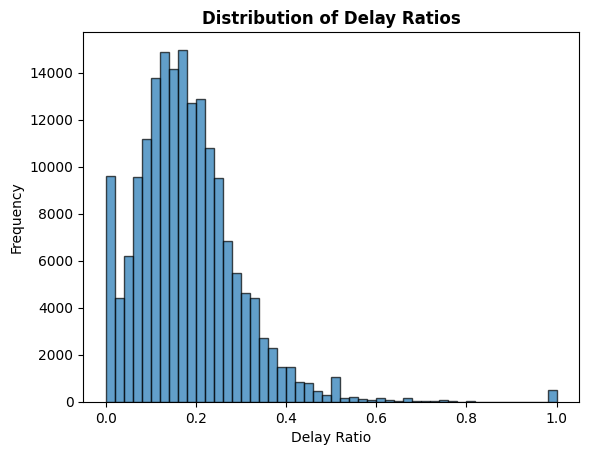

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['delay_ratio'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Delay Ratios', fontsize=12, fontweight='bold')
plt.xlabel('Delay Ratio')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Delay Categories Distribution')

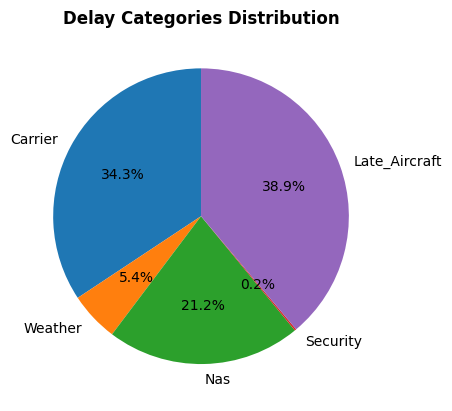

In [19]:
delay_categories = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_totals = df[delay_categories].sum()
delay_totals_clean = delay_totals[delay_totals > 0]
plt.pie(delay_totals_clean.values, labels=[label.replace('_delay', '').title() for label in delay_totals_clean.index],
autopct='%1.1f%%', startangle=90)
plt.title('Delay Categories Distribution', fontsize=12, fontweight='bold')

Text(0.5, 0, 'Delay Rate (%)')

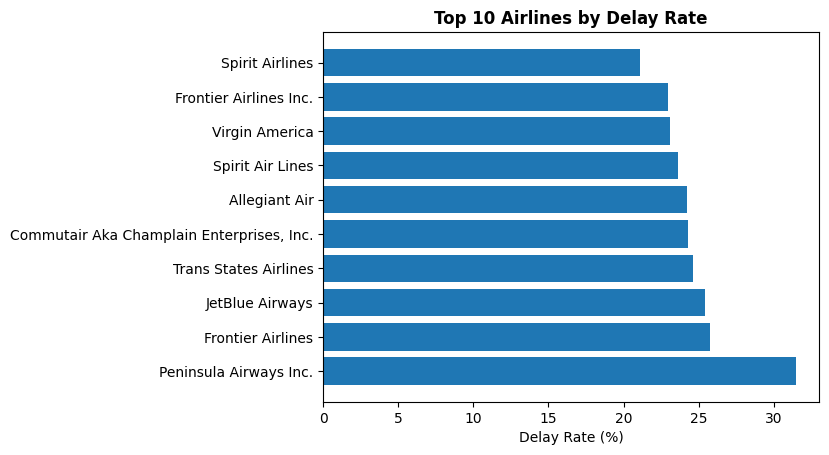

In [20]:
airline_delays = df.groupby('carrier_name').agg({
'arr_flights': 'sum',
'arr_del15': 'sum'
}).reset_index()
airline_delays['delay_rate'] = (airline_delays['arr_del15'] / airline_delays['arr_flights'] * 100)
airline_delays = airline_delays[airline_delays['arr_flights'] >= 1000]  # Filter for significant traffic
top_airlines = airline_delays.nlargest(10, 'delay_rate')
plt.barh(range(len(top_airlines)), top_airlines['delay_rate'])
plt.yticks(range(len(top_airlines)), top_airlines['carrier_name'])
plt.title('Top 10 Airlines by Delay Rate', fontsize=12, fontweight='bold')
plt.xlabel('Delay Rate (%)')


Text(0, 0.5, 'Average Delay (minutes)')

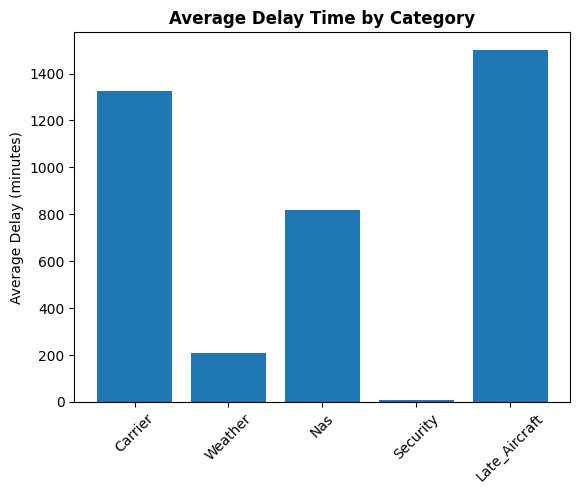

In [21]:
avg_delays = df[delay_categories].mean()
avg_delays_clean = avg_delays[avg_delays > 0]
plt.bar(range(len(avg_delays_clean)), avg_delays_clean.values)
plt.xticks(range(len(avg_delays_clean)), [label.replace('_delay', '').title() for label in avg_delays_clean.index], rotation=45)
plt.title('Average Delay Time by Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Delay (minutes)')

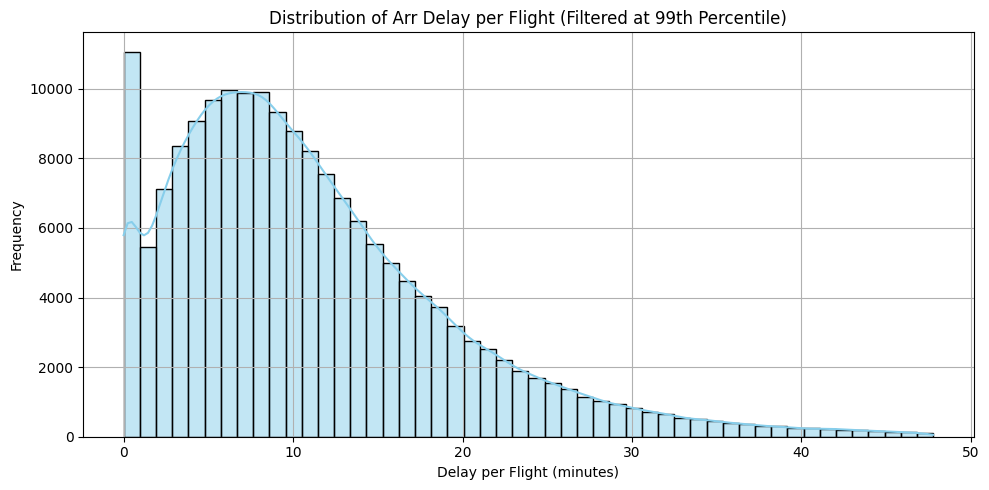

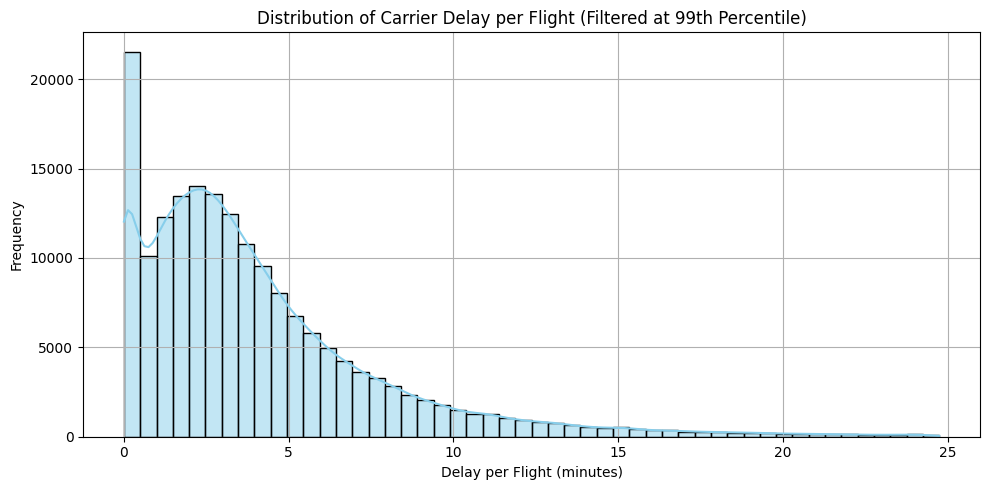

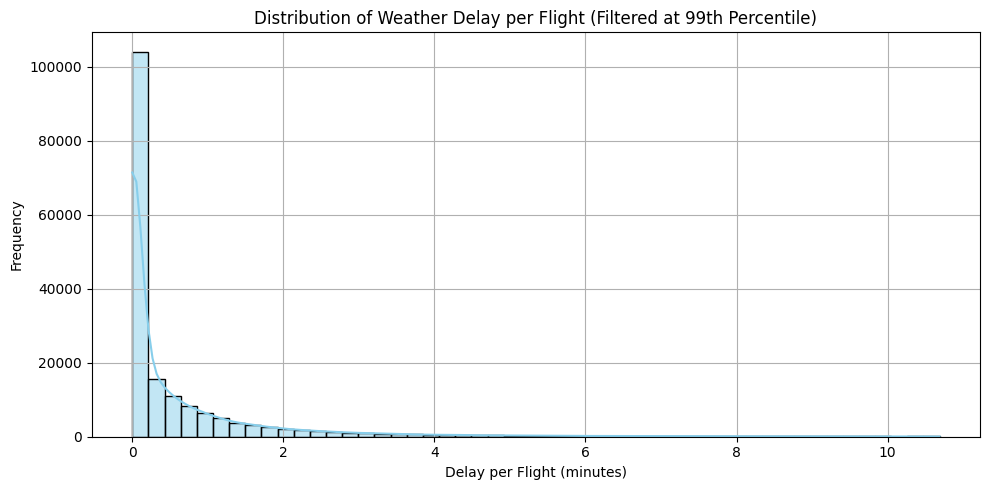

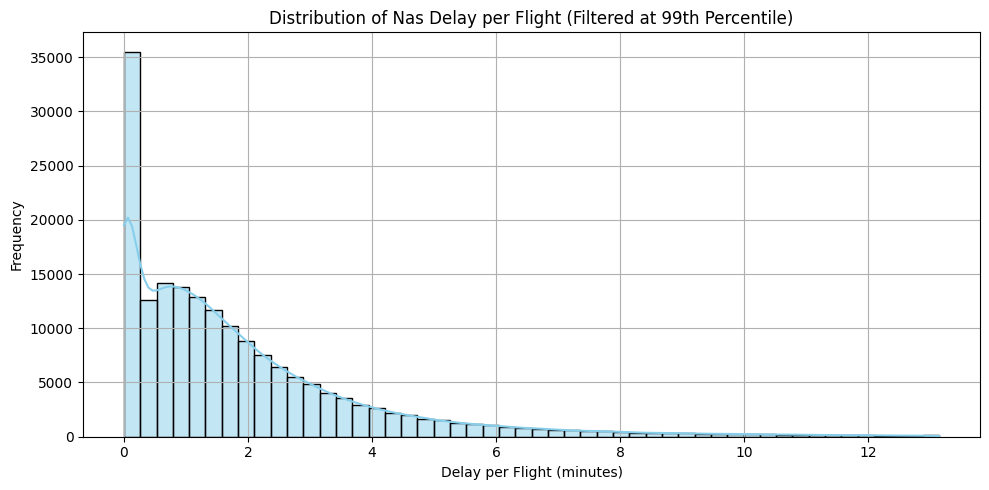

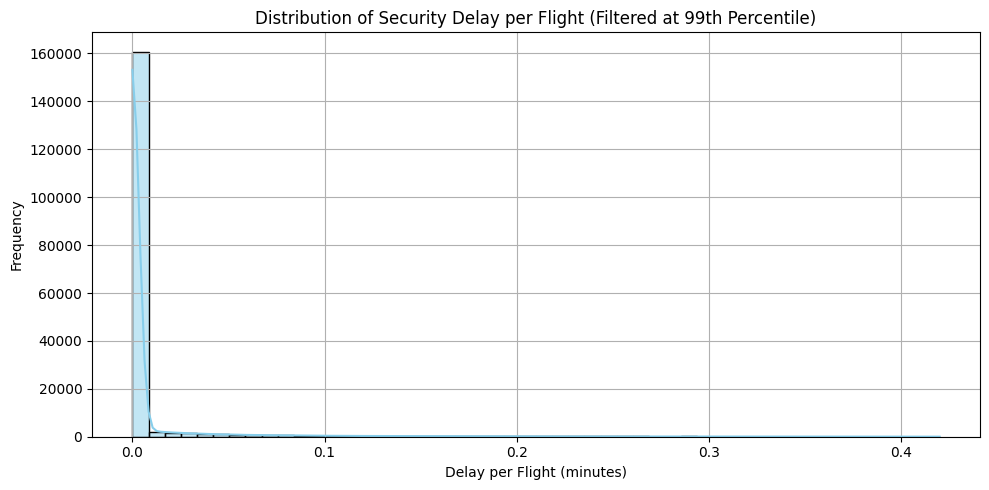

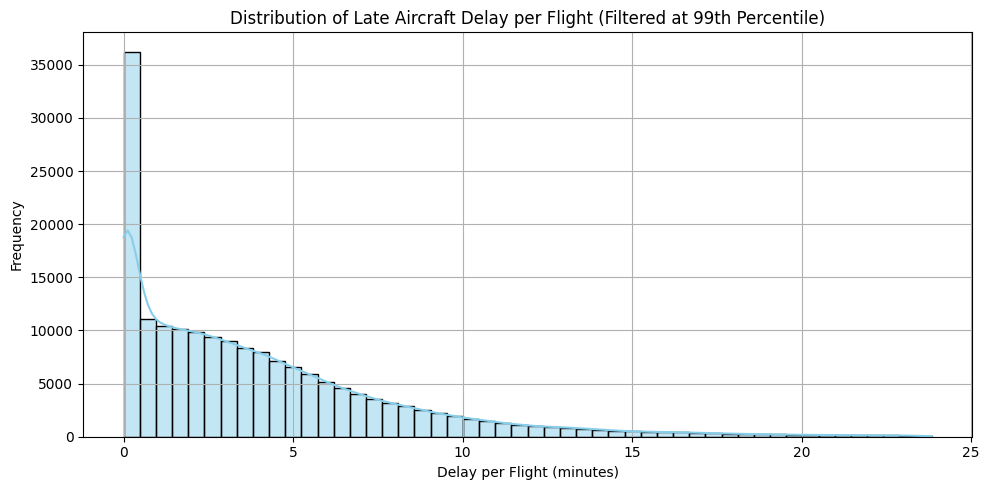

In [22]:
# Create per-flight versions of the delay metrics
delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
for col in delay_cols:
    df[f'{col}_per_flight'] = df[col] / df['arr_flights']

    per_flight_col = f'{col}_per_flight'

    # Drop NaNs or infinities
    valid_data = df[per_flight_col].replace([float('inf'), float('-inf')], pd.NA).dropna()

    # Apply 99th percentile threshold
    threshold = valid_data.quantile(0.99)
    filtered_data = valid_data[valid_data <= threshold]
    plt.figure(figsize=(10, 5))
    sns.histplot(filtered_data, bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()} per Flight (Filtered at 99th Percentile)')
    plt.xlabel('Delay per Flight (minutes)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


===== delay_ratio =====
count    177237.000000
mean          0.174864
std           0.100337
min           0.000000
25%           0.104000
50%           0.166667
75%           0.235294
max           0.500000
Name: delay_ratio, dtype: float64


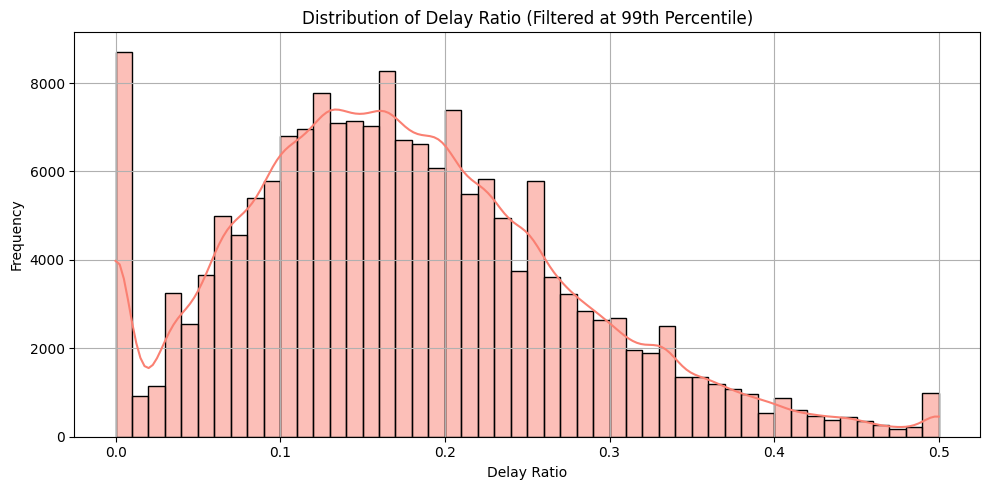

In [23]:
columns_to_plot = ['delay_ratio']

for col in columns_to_plot:
    valid_data = df[col].replace([float('inf'), float('-inf')], pd.NA).dropna()
    threshold = valid_data.quantile(0.99)
    filtered_data = valid_data[valid_data <= threshold]

    # Summary
    print(f"\n===== {col} =====")
    print(filtered_data.describe())

    # Plot
    plt.figure(figsize=(10, 5))
    sns.histplot(filtered_data, bins=50, kde=True, color='salmon')
    plt.title(f'Distribution of {col.replace("_", " ").title()} (Filtered at 99th Percentile)')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("percent_delayed.png" , bbox_inches = "tight")
    plt.show()

Text(0, 0.5, 'Number of Flights')

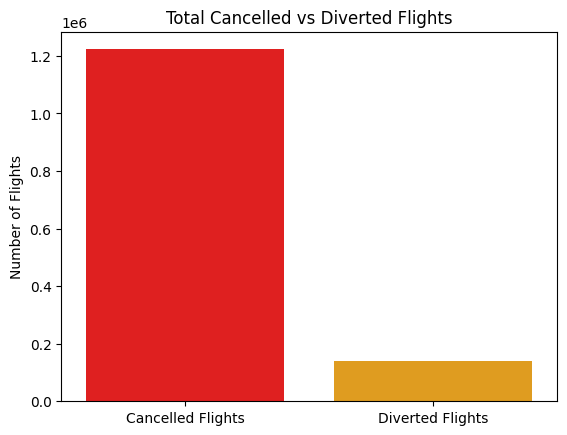

In [24]:
total_cancelled = df['arr_cancelled'].sum()
total_diverted = df['arr_diverted'].sum()
sns.barplot(x=['Cancelled Flights', 'Diverted Flights'], y=[total_cancelled, total_diverted], palette=['red','orange'])
plt.title('Total Cancelled vs Diverted Flights')
plt.ylabel('Number of Flights')

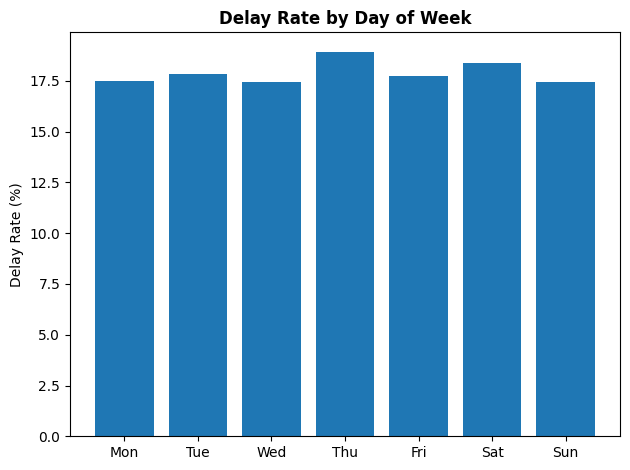

In [25]:
df['day_of_week'] = df['date'].dt.dayofweek
daily_delays = df.groupby('day_of_week').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum'
}).reset_index()
daily_delays['delay_rate'] = (daily_delays['arr_del15'] / daily_delays['arr_flights'] * 100)
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(range(7), daily_delays['delay_rate'])
plt.xticks(range(7), days)
plt.title('Delay Rate by Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Delay Rate (%)')

plt.tight_layout()
plt.show()

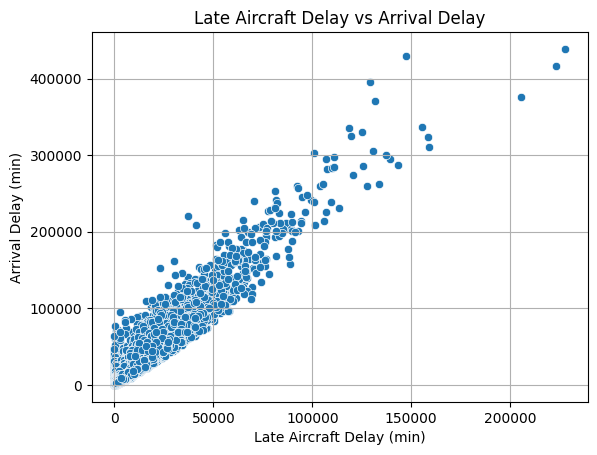

In [26]:
sns.scatterplot(data=df, x='late_aircraft_delay', y='arr_delay')
plt.title('Late Aircraft Delay vs Arrival Delay')
plt.xlabel('Late Aircraft Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.grid(True)
plt.show()

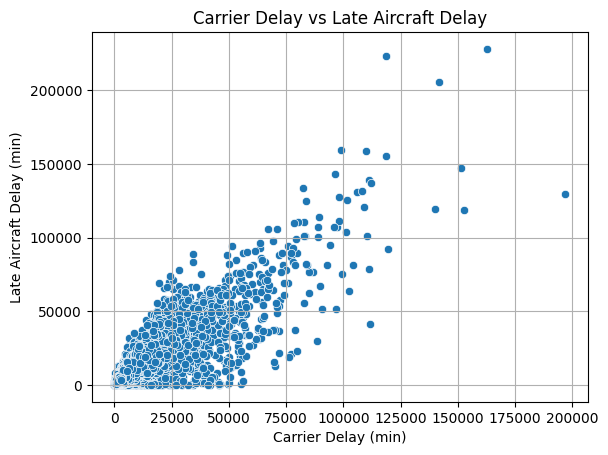

In [27]:
sns.scatterplot(data=df, x='carrier_delay', y='late_aircraft_delay')
plt.title('Carrier Delay vs Late Aircraft Delay')
plt.xlabel('Carrier Delay (min)')
plt.ylabel('Late Aircraft Delay (min)')
plt.grid(True)
plt.show()

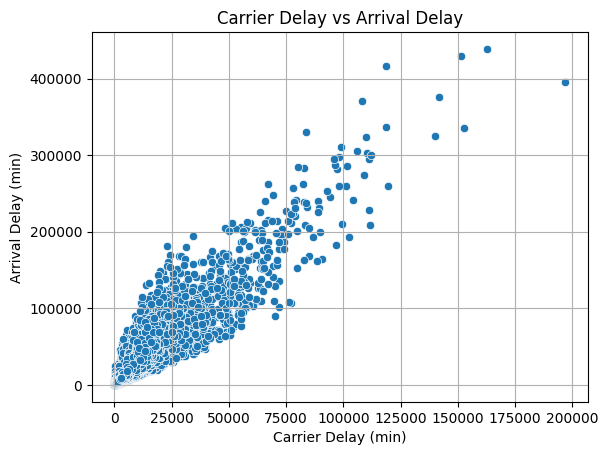

In [28]:
sns.scatterplot(data=df, x='carrier_delay', y='arr_delay')
plt.title('Carrier Delay vs Arrival Delay')
plt.xlabel('Carrier Delay (min)')
plt.ylabel('Arrival Delay (min)')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Flights vs Total Delay')

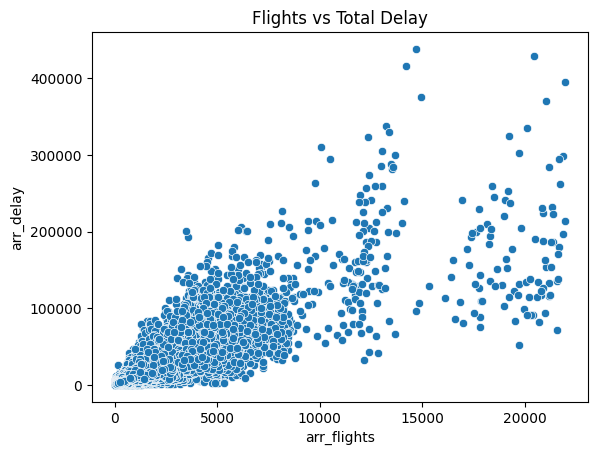

In [29]:
sns.scatterplot(data=df, x='arr_flights', y='arr_delay')
plt.title("Flights vs Total Delay")

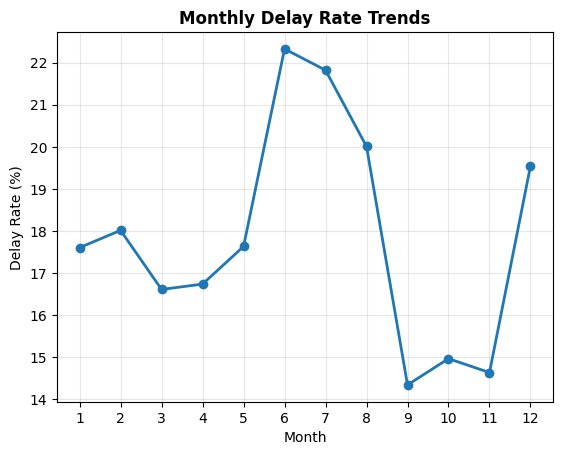

In [30]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['month'] = df['date'].dt.month
monthly_delays = df.groupby('month').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum'
    }).reset_index()
monthly_delays['delay_rate'] = (monthly_delays['arr_del15'] / monthly_delays['arr_flights'] * 100)

plt.plot(monthly_delays['month'], monthly_delays['delay_rate'], marker='o', linewidth=2)
plt.title('Monthly Delay Rate Trends', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

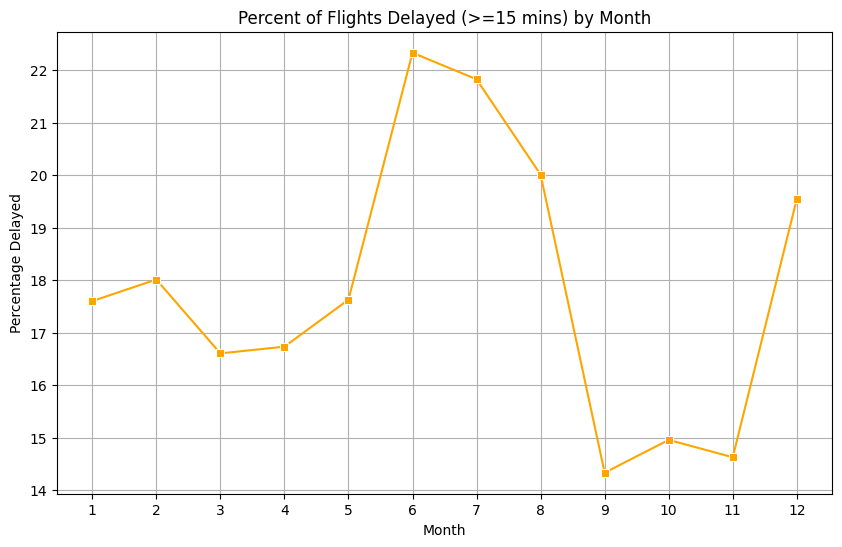

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_delays, x='month', y='delay_rate', marker='s', color='orange')
plt.title("Percent of Flights Delayed (>=15 mins) by Month")
plt.xlabel("Month")
plt.ylabel("Percentage Delayed")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [32]:
carrier_group = df.groupby('carrier')[[
    'arr_flights', 'arr_delay', 'arr_del15',
    'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]].sum().reset_index()

# Derived metrics
carrier_group['avg_delay_per_flight'] = carrier_group['arr_delay'] / carrier_group['arr_flights']
carrier_group['percent_delayed'] = carrier_group['arr_del15'] / carrier_group['arr_flights']

# Sort by average delay
carrier_group.sort_values('avg_delay_per_flight', ascending=False, inplace=True)

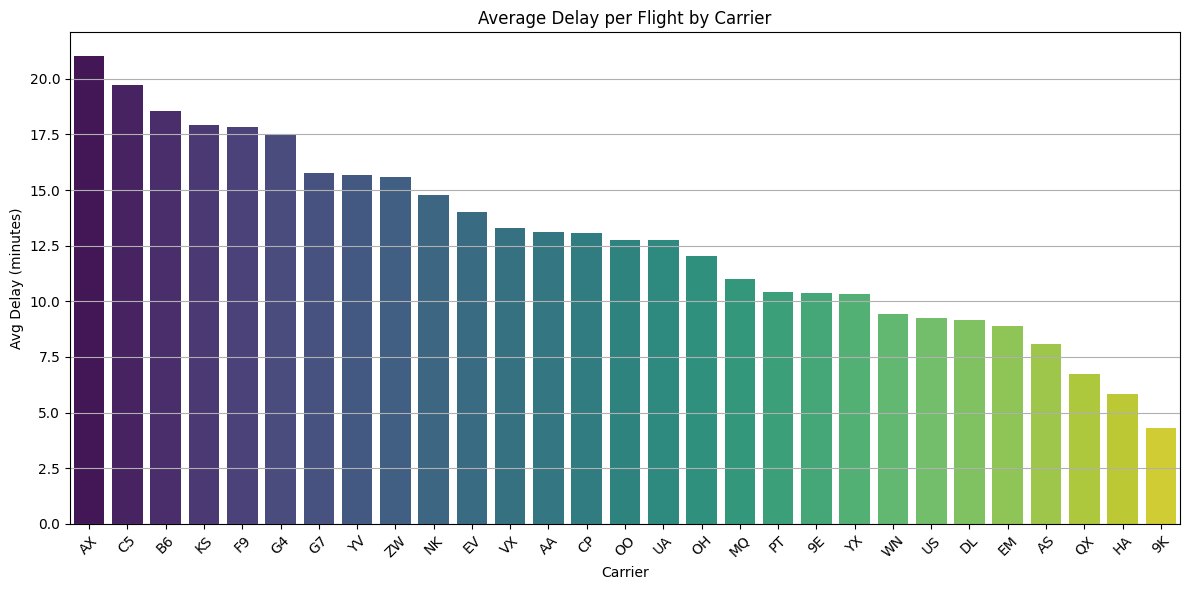

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=carrier_group, x='carrier', y='avg_delay_per_flight', palette='viridis')
plt.title("Average Delay per Flight by Carrier")
plt.ylabel("Avg Delay (minutes)")
plt.xlabel("Carrier")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

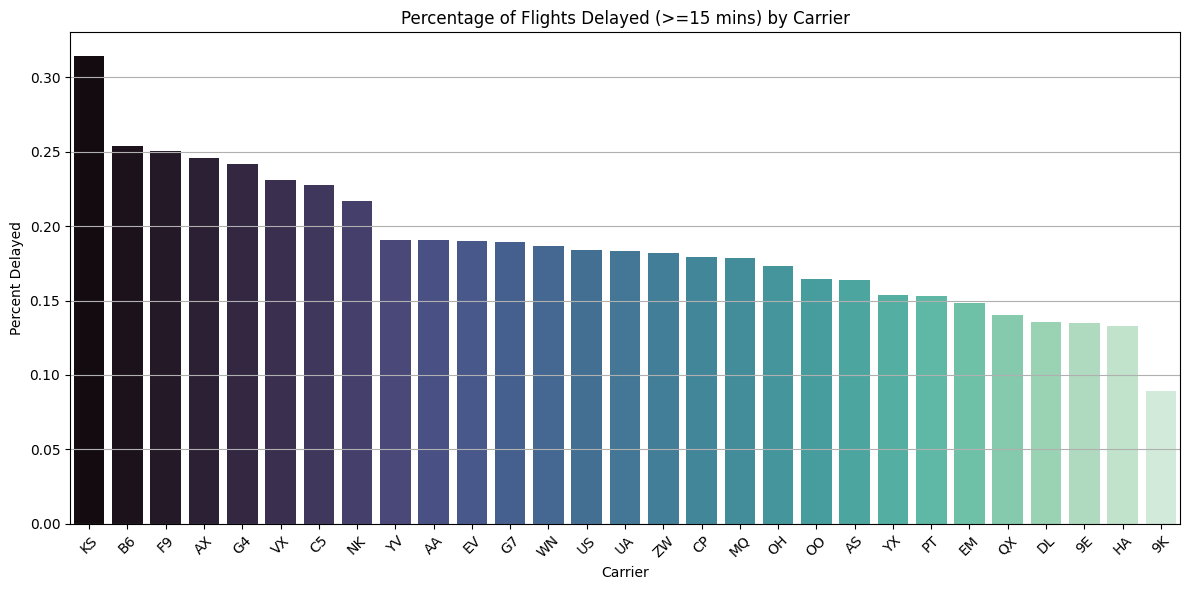

In [34]:
carrier_group.sort_values('percent_delayed', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=carrier_group, x='carrier', y='percent_delayed', palette='mako')
plt.title("Percentage of Flights Delayed (>=15 mins) by Carrier")
plt.ylabel("Percent Delayed")
plt.xlabel("Carrier")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Total Delay Minutes by Cause:
late_aircraft_delay    268827517.0
carrier_delay          237268793.0
nas_delay              146768462.0
weather_delay           37430676.0
security_delay           1224329.0
dtype: float64


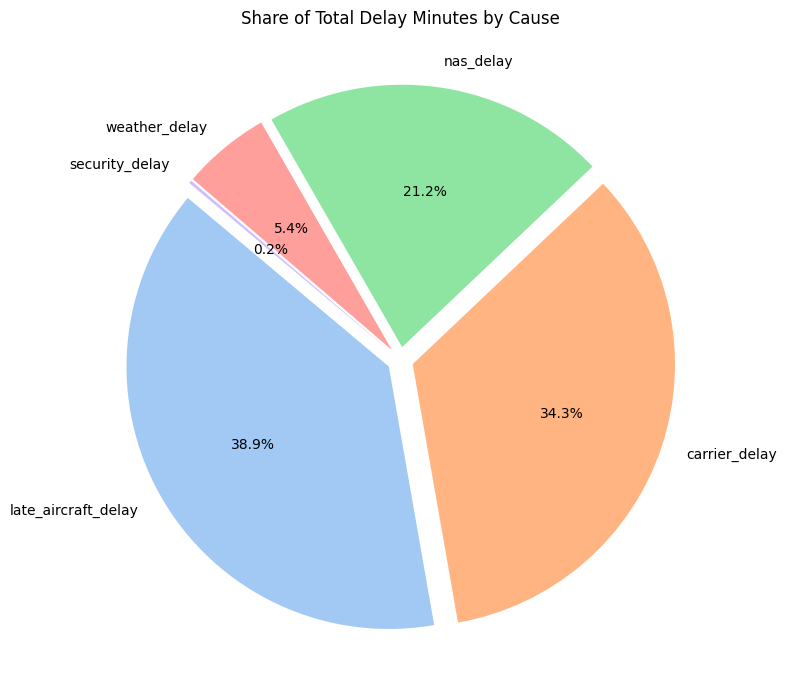

In [35]:
# Total delay minutes for each cause
delay_causes = df[[
    'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]].sum().sort_values(ascending=False)

# Print raw values
print("Total Delay Minutes by Cause:")
print(delay_causes)

# Plot: Pie chart of delay causes
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
delay_causes.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    labels=delay_causes.index,
    explode=[0.05]*len(delay_causes)
)
plt.title("Share of Total Delay Minutes by Cause")
plt.ylabel("")
plt.tight_layout()
plt.savefig("share_of_total_delay_minutes.png", bbox_inches='tight')
plt.show()

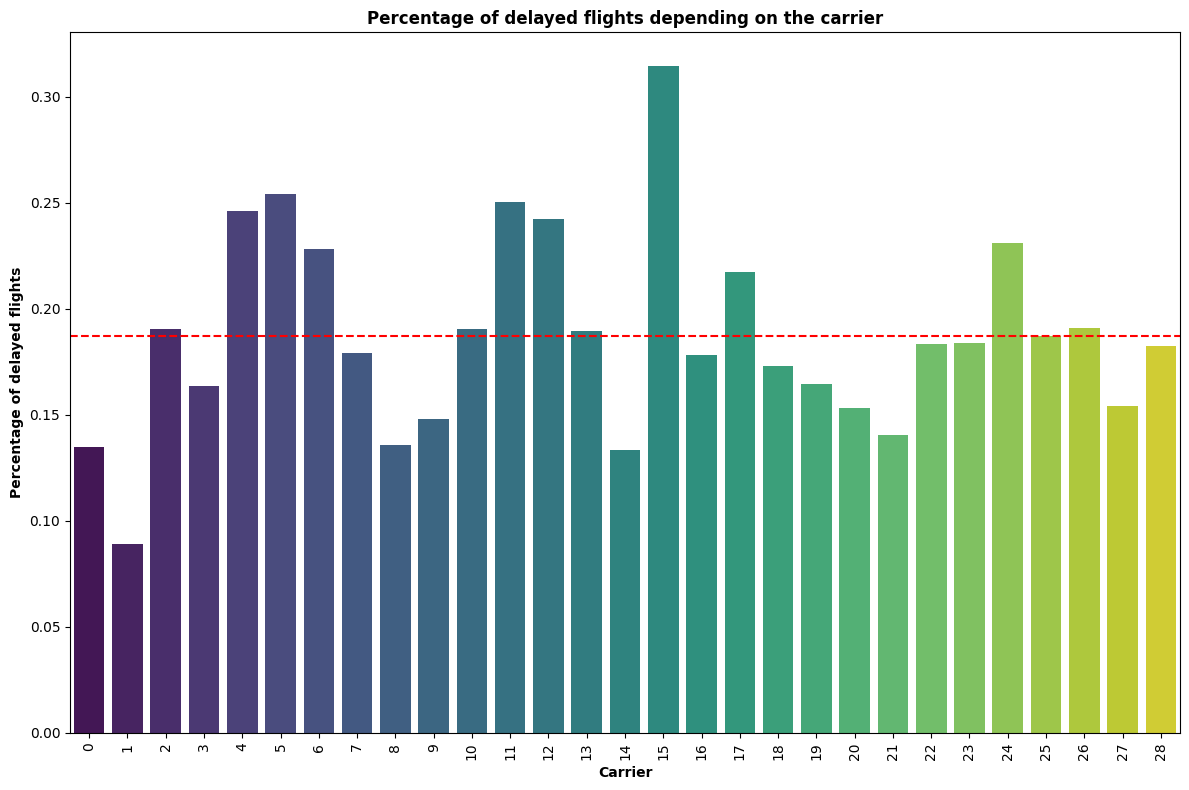

In [36]:
plt.figure(figsize = (12,8))
sns.barplot(x=carrier_group.index, y=carrier_group['percent_delayed'], palette = 'viridis')

# Horizontal line (overall average)
mean_perc_del = carrier_group['percent_delayed'].mean()
plt.axhline(y=mean_perc_del, color='red', linestyle='--', label=f'Mean: {mean_perc_del:.2f}')


plt.title('Percentage of delayed flights depending on the carrier', fontweight = 'bold')
plt.ylabel('Percentage of delayed flights', fontweight = 'bold')
plt.xlabel('Carrier', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import joblib


In [38]:
# Assume df['month'] contains values from 1 to 12
df['month_num'] = df['month']
df['month_sin'] = np.sin(2 * np.pi * df['month_num'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month_num'] / 12)

from sklearn.preprocessing import LabelEncoder

# Create and fit label encoder
le = LabelEncoder()
df['carrier_encoded'] = le.fit_transform(df['carrier'])

#Add holiday month feature (existing)
df['is_holiday_month'] = df['month_num'].isin([7, 8, 12]).astype(int)

#Target variable: is delayed
df['is_delayed'] = (df['arr_del15'] > 0).astype(int)

#Encode airport_name
le_airport = LabelEncoder()
df['airport_encoded'] = le_airport.fit_transform(df['airport_name'].astype(str))

In [39]:
features= ['month_sin', 'month_cos', 'carrier_encoded', 'is_holiday_month', 'airport_encoded','arr_flights', 'arr_cancelled', 'arr_diverted']
target= 'is_delayed'

x = df[features]
y = df[target]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data (existing)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [42]:
y_pred =  rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:, 1]

In [43]:
# Metrics
print("\n📊 Final Classification Report (After SMOTE & No Leaky Features):")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix (After SMOTE & No Leaky Features):")
print(confusion_matrix(y_test, y_pred))

print("\n🎯 ROC AUC Score (After SMOTE & No Leaky Features):", roc_auc_score(y_test, y_proba))

# Save the updated model
joblib.dump(rf, "final_randomforest_classifier_no_leakage.pkl")
print("\nImproved model saved as 'final_randomforest_classifier_no_leakage.pkl'")


📊 Final Classification Report (After SMOTE & No Leaky Features):
              precision    recall  f1-score   support

           0       0.55      0.50      0.53      1658
           1       0.98      0.98      0.98     34142

    accuracy                           0.96     35800
   macro avg       0.76      0.74      0.75     35800
weighted avg       0.96      0.96      0.96     35800


📊 Confusion Matrix (After SMOTE & No Leaky Features):
[[  834   824]
 [  672 33470]]

🎯 ROC AUC Score (After SMOTE & No Leaky Features): 0.9325387127585147

Improved model saved as 'final_randomforest_classifier_no_leakage.pkl'


In [44]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
y_pred =  xgb_model.predict(x_test)
y_proba = xgb_model.predict_proba(x_test)[:, 1]


📊 Final Classification Report (After SMOTE & No Leaky Features):
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1658
           1       0.98      0.98      0.98     34142

    accuracy                           0.96     35800
   macro avg       0.77      0.78      0.78     35800
weighted avg       0.96      0.96      0.96     35800


📊 Confusion Matrix (After SMOTE & No Leaky Features):
[[  971   687]
 [  741 33401]]

🎯 ROC AUC Score (After SMOTE & No Leaky Features): 0.9620695150368584

Improved model saved as 'final_xgboost_classifier_no_leakage.pkl'


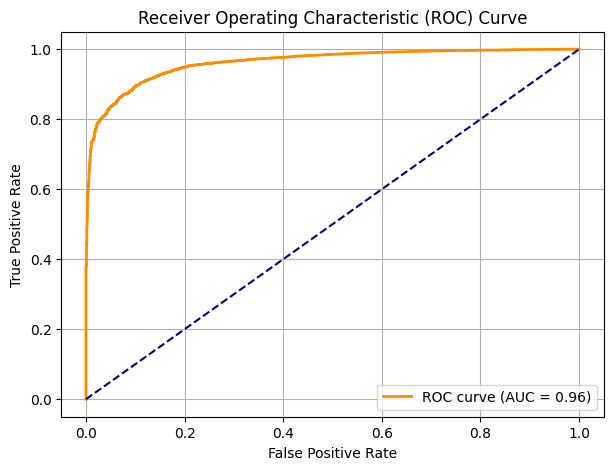

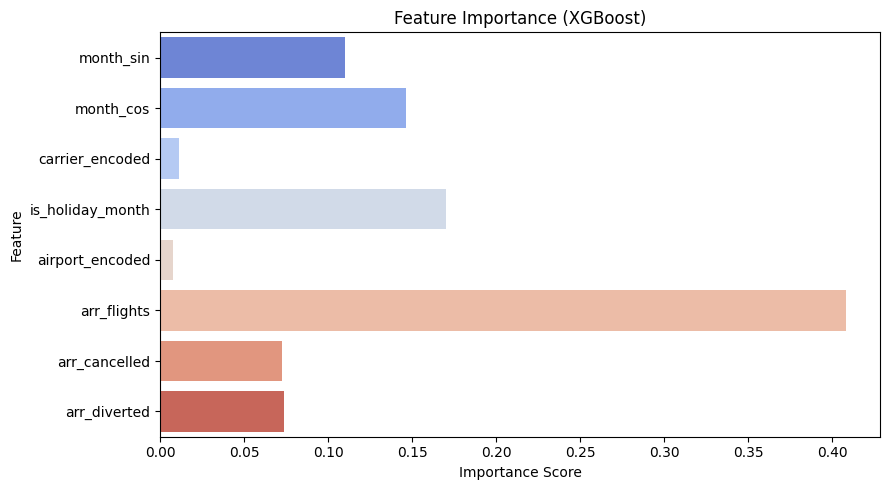

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# Metrics
print("\n📊 Final Classification Report (After SMOTE & No Leaky Features):")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix (After SMOTE & No Leaky Features):")
print(confusion_matrix(y_test, y_pred))

print("\n🎯 ROC AUC Score (After SMOTE & No Leaky Features):", roc_auc_score(y_test, y_proba))

# Save the updated model
joblib.dump(xgb_model, "final_xgboost_classifier_no_leakage.pkl")
print("\nImproved model saved as 'final_xgboost_classifier_no_leakage.pkl'")
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 📌 Feature Importance
importances = xgb_model.feature_importances_
feat_names = x_test.columns

plt.figure(figsize=(9, 5))
sns.barplot(x=importances, y=feat_names, palette="coolwarm")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [47]:
# Avoid divide by zero
df['arr_flights'] = df['arr_flights'].replace(0, np.nan)
# Create delay per flight
df['avg_delay_per_flight'] = df['arr_delay'] / df['arr_flights']
df['avg_delay_per_flight'] = df['avg_delay_per_flight'].replace([np.inf, -np.inf], np.nan)
# Remove rows with missing or invalid target
df_reg = df[df['avg_delay_per_flight'].notna()].copy()

# Cap extreme delays (e.g. >180 min)
df_reg['avg_delay_per_flight'] = df_reg['avg_delay_per_flight'].clip(upper=180)

# Encode month
df_reg['month_num'] = df_reg['month']
df_reg['month_sin'] = np.sin(2 * np.pi * df_reg['month_num'] / 12)
df_reg['month_cos'] = np.cos(2 * np.pi * df_reg['month_num'] / 12)


# Encode carrier
le = LabelEncoder()
df_reg['carrier_enc'] = le.fit_transform(df_reg['carrier'].astype(str))

# Holiday month flag
df_reg['is_holiday_month'] = df_reg['month_num'].isin([7, 8, 12]).astype(int)

# Optional: Normalize arr_flights
df_reg['arr_flights_norm'] = df_reg['arr_flights'] / df_reg['arr_flights'].max()

In [48]:
features_reg = ['month_sin', 'month_cos', 'carrier_enc', 'is_holiday_month', 'arr_flights_norm']
target_reg = 'avg_delay_per_flight'

X_reg = df_reg[features_reg]
y_reg = df_reg[target_reg]


In [49]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)


In [50]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred_reg = reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("📊 Standard Regression Metrics:")
print(f"MAE  (Mean Absolute Error):     {mae:.2f} minutes")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} minutes")

📊 Standard Regression Metrics:
MAE  (Mean Absolute Error):     6.45 minutes
RMSE (Root Mean Squared Error): 10.63 minutes


In [52]:
# Compute OAI: controllable portion of delay
df_reg['controllable_delay'] = df_reg['carrier_delay'] + df_reg['late_aircraft_delay']
df_reg['OAI'] = (df_reg['controllable_delay'] / df_reg['arr_delay'].replace(0, np.nan)).fillna(0)
# Align OAI weights with test data
oai_weights = 1 + 3 * df_reg.loc[X_test_reg.index, 'OAI']  # λ = 3

# Weighted MAE & RMSE
weighted_mae = np.average(np.abs(y_test_reg - y_pred_reg), weights=oai_weights)
weighted_rmse = np.sqrt(np.average((y_test_reg - y_pred_reg) ** 2, weights=oai_weights))

print("\n📊 OAI-Weighted Metrics:")
print(f"Weighted MAE : {weighted_mae:.2f} min")
print(f"Weighted RMSE: {weighted_rmse:.2f} min")


📊 OAI-Weighted Metrics:
Weighted MAE : 6.29 min
Weighted RMSE: 10.49 min


In [53]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(n_estimators=200, max_depth=20, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
y_pred_reg = xgb_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("📊 Standard Regression Metrics:")
print(f"MAE  (Mean Absolute Error):     {mae:.2f} minutes")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f} minutes")

📊 Standard Regression Metrics:
MAE  (Mean Absolute Error):     6.91 minutes
RMSE (Root Mean Squared Error): 11.25 minutes


In [55]:
# Compute OAI: controllable portion of delay
df_reg['controllable_delay'] = df_reg['carrier_delay'] + df_reg['late_aircraft_delay']
df_reg['OAI'] = (df_reg['controllable_delay'] / df_reg['arr_delay'].replace(0, np.nan)).fillna(0)
# Align OAI weights with test data
oai_weights = 1 + 3 * df_reg.loc[X_test_reg.index, 'OAI']  # λ = 3

# Weighted MAE & RMSE
weighted_mae = np.average(np.abs(y_test_reg - y_pred_reg), weights=oai_weights)
weighted_rmse = np.sqrt(np.average((y_test_reg - y_pred_reg) ** 2, weights=oai_weights))

print("\n📊 OAI-Weighted Metrics:")
print(f"Weighted MAE : {weighted_mae:.2f} min")
print(f"Weighted RMSE: {weighted_rmse:.2f} min")


📊 OAI-Weighted Metrics:
Weighted MAE : 6.77 min
Weighted RMSE: 11.10 min


In [56]:
!pip install shap


📌 Mean Absolute Error (MAE): 67.76 minutes
📌 Root Mean Squared Error (RMSE): 91.68 minutes
📌 R^2 Score: 0.71


100%|===================| 12497/12549 [01:25<00:00]       

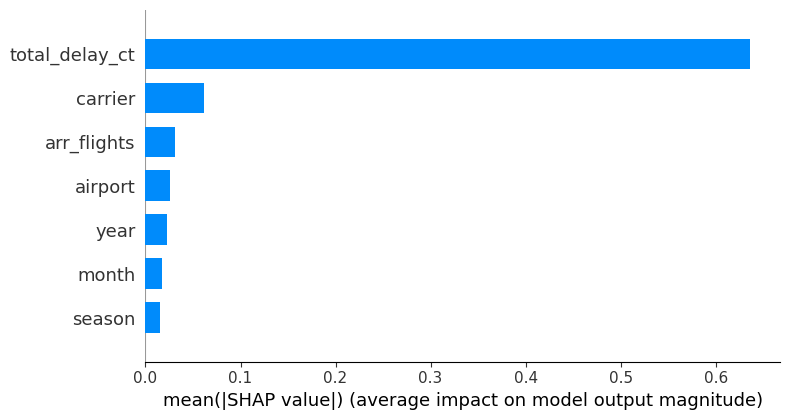

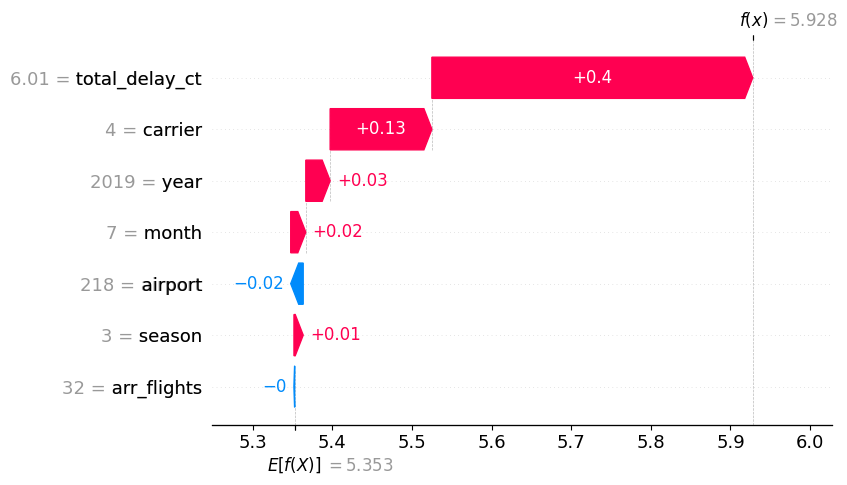


⚠️ High-error predictions (>30 min): 4419
💡 Mean OAI of these: 77.33


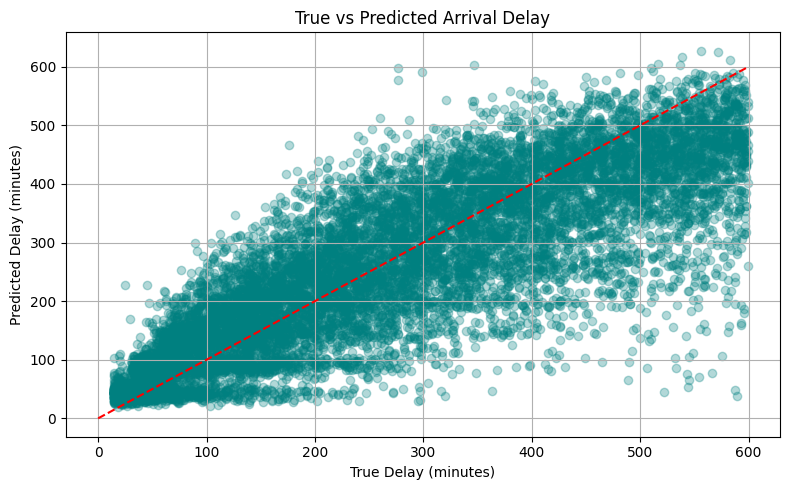

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import shap
import warnings
warnings.filterwarnings("ignore")


# ✨ Feature Engineering
# Define OAI: Prioritize controllable delays
controllable = df['carrier_delay'] + df['late_aircraft_delay']
uncontrollable = df['weather_delay'] + df['nas_delay'] + df['security_delay']
df['OAI'] = 100 * controllable / (controllable + uncontrollable + 1e-5)

# Drop rows with NaNs and focus on delays > 0
df = df[df['arr_delay'].notna()]
df = df[df['arr_delay'] > 0]
df = df[df['arr_delay'] < 600]  # Remove extreme delays > 10 hrs

# Additional Features
# Add season based on month
df['season'] = df['month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
# Add total_delay_cause
df['total_delay_ct'] = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum(axis=1)

# 🎯 Select Features for Regression
features = ['year', 'month', 'season', 'carrier', 'airport', 'arr_flights', 'total_delay_ct']
df['carrier'] = df['carrier'].astype('category').cat.codes
df['airport'] = df['airport'].astype('category').cat.codes

X = df[features]
y = np.log1p(df['arr_delay'])  # Log transform target
oai = df['OAI']

# 🎲 Train-Test Split
X_train, X_test, y_train, y_test, oai_train, oai_test = train_test_split(
    X, y, oai, test_size=0.2, random_state=42
)

# 🎯 Define Sample Weights based on OAI
sample_weights = 1 + oai_train / (oai_train.max() + 1)

# 🧠 Train the Model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# 📊 Predict
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

# 📈 Metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\n📌 Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"📌 R^2 Score: {r2:.2f}")

# 🔍 SHAP Explainability
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Waterfall for One Prediction
shap.plots.waterfall(shap_values[0])

# 🔁 OAI Impact Evaluation on High-Error Predictions
residual = y_true - y_pred
high_error = residual > 30  # 30 min threshold
print(f"\n⚠️ High-error predictions (>30 min): {high_error.sum()}")
print(f"💡 Mean OAI of these: {oai_test[high_error].mean():.2f}")

# 📉 Plot True vs Predicted Delay
plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred, alpha=0.3, color='teal')
plt.plot([0, max(y_true)], [0, max(y_true)], color='red', linestyle='--')
plt.xlabel("True Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("True vs Predicted Arrival Delay")
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# Define OAI weights for each delay type
oai_weights = {
    'carrier': 0.7,
    'late_aircraft': 0.8,
    'nas': 0.3,
    'weather': 0.1,
    'security': 0.2
}

# Calculate weighted delay count per flight
oai_score = (
    df['carrier_ct'] * oai_weights['carrier'] +
    df['late_aircraft_ct'] * oai_weights['late_aircraft'] +
    df['nas_ct'] * oai_weights['nas'] +
    df['weather_ct'] * oai_weights['weather'] +
    df['security_ct'] * oai_weights['security']
) / df['arr_flights']

df['oai_score'] = oai_score

# Calculate weighted delay duration per flight
oai_duration = (
    df['carrier_delay'] * oai_weights['carrier'] +
    df['late_aircraft_delay'] * oai_weights['late_aircraft'] +
    df['nas_delay'] * oai_weights['nas'] +
    df['weather_delay'] * oai_weights['weather'] +
    df['security_delay'] * oai_weights['security']
) / df['arr_flights']

df['oai_weighted_duration'] = oai_duration

# Print key statistics
print("\nOAI Weights Used:")
for k, v in oai_weights.items():
    print(f"  • {k.title()}: {v}")

print("\ OAI Score Summary:")
print(f"  • Mean Score     : {df['oai_score'].mean():.4f}")
print(f"  • Std Deviation  : {df['oai_score'].std():.4f}")
print(f"  • Max Score      : {df['oai_score'].max():.4f}")



OAI Weights Used:
  • Carrier: 0.7
  • Late_Aircraft: 0.8
  • Nas: 0.3
  • Weather: 0.1
  • Security: 0.2
\ OAI Score Summary:
  • Mean Score     : 0.0902
  • Std Deviation  : 0.0813
  • Max Score      : 0.8000


In [62]:
# Assuming `y_true` = actual delay durations and `y_pred` = predicted values from regression model
mse = np.mean((y_true - y_pred) ** 2)
oai_penalty = np.mean(np.maximum(0, y_true - y_pred) ** 2)
oai_loss = mse + 0.5 * oai_penalty

print(f" OAI-Aware Loss Evaluation:")
print(f"  • MSE: {mse:.4f}")
print(f"  • OAI Penalty: {oai_penalty:.4f}")
print(f"  • Combined OAI Loss: {oai_loss:.4f}")

 OAI-Aware Loss Evaluation:
  • MSE: 8405.8672
  • OAI Penalty: 5957.0983
  • Combined OAI Loss: 11384.4163
